In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx


In [31]:
file_path = '/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx'

xl_file = pd.ExcelFile(file_path)

dfs = {sheet_name: xl_file.parse(sheet_name)
          for sheet_name in xl_file.sheet_names}
df = dfs["E Comm"]
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [32]:
df.shape

(5630, 20)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [34]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [36]:
def bar_chart(feature, df):
    churn = df[df['Churn']==1][feature].value_counts()
    stays = df[df['Churn']==0][feature].value_counts()
    df = pd.DataFrame([churn,stays])
    df.index = ['Churn','Stay']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
def plot_distribution(feature, df):
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature],  color='skyblue', edgecolor='black')
  plt.xlabel('Valores')
  plt.ylabel('Frequência')
  plt.title('Distribuição da coluna "coluna"')
  plt.grid(True)
  plt.show()

def bar_chart_non_categorical(feature, df, bins):
    # Criando intervalos para a feature não-categórica

    df['intervalos'] = pd.cut(df[feature], bins=bins)

    # Contando os churns e stays para cada intervalo
    churn = df[df['Churn'] == 1]['intervalos'].value_counts().sort_index()
    stays = df[df['Churn'] == 0]['intervalos'].value_counts().sort_index()

    # Criando um DataFrame com os dados
    data = {'Churn': churn, 'Stay': stays}
    df_plot = pd.DataFrame(data)

    # Plotando o gráfico de barras
    df_plot.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.xlabel(f'{feature} Intervalos')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição do Churn por Intervalo de {feature}')
    plt.show()

def line_chart_non_categorical(feature, df):
    facet = sns.FacetGrid(df, hue="Churn",aspect=4)
    facet.map(sns.kdeplot,feature,shade= True)
    facet.set(xlim=(0, df[feature].max()))
    facet.add_legend()

    plt.show()

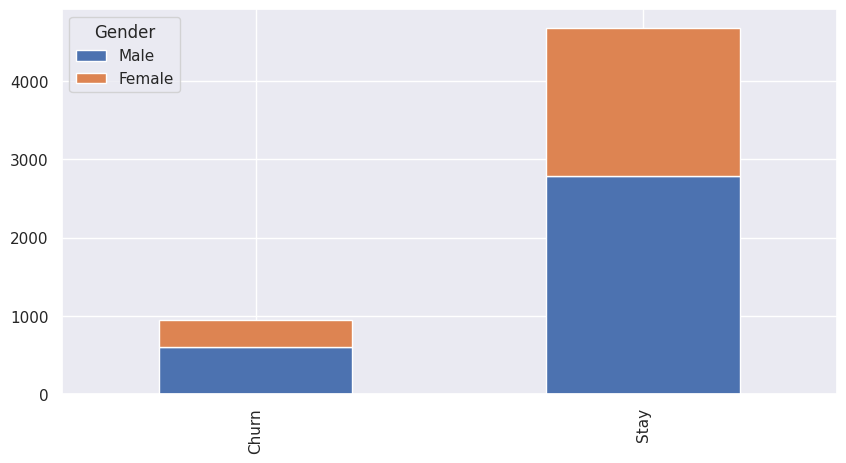

In [37]:
bar_chart("Gender",df)

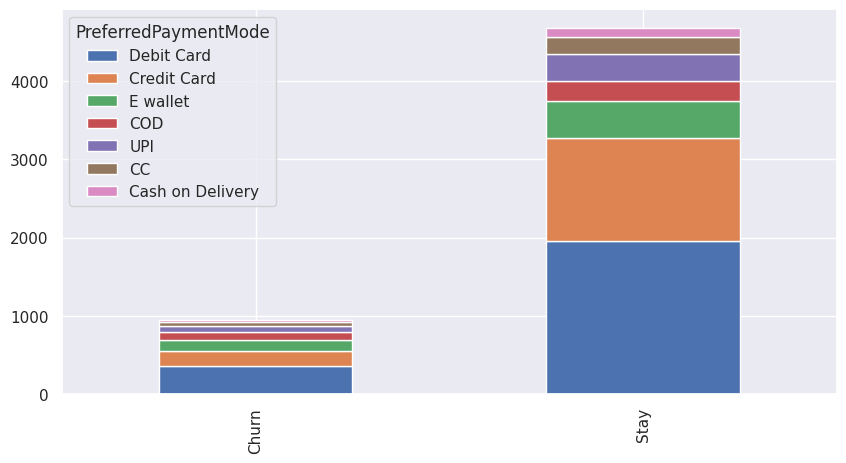

In [18]:
bar_chart("PreferredPaymentMode",df)

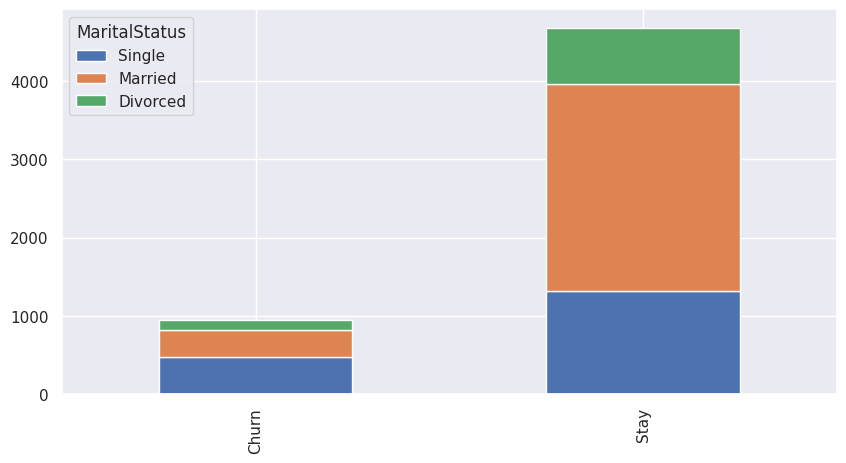

In [19]:
bar_chart("MaritalStatus",df)

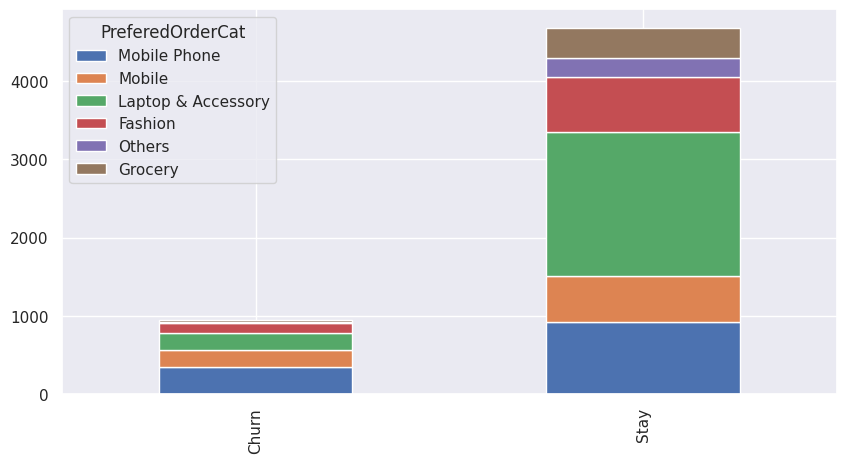

In [20]:
bar_chart("PreferedOrderCat",df)

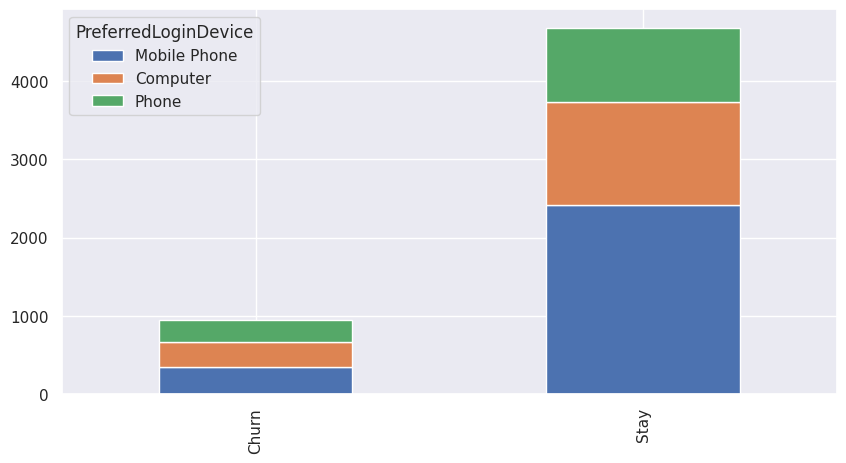

In [21]:
bar_chart("PreferredLoginDevice",df)

In [38]:
sex_types = {"Male": 1, "Female": 0}
df["Gender"] = df["Gender"].map(sex_types)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,0,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,1,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,1,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,1,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,1,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,1,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,1,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,1,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,1,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [26]:
payment_methods = list(df['PreferredPaymentMode'].unique())
payment_methods

['Debit Card',
 'UPI',
 'CC',
 'Cash on Delivery',
 'E wallet',
 'COD',
 'Credit Card']

In [39]:
pay_methods = {'Debit Card': 0,
 'UPI':1,
 'CC':2,
 'Cash on Delivery':3,
 'E wallet':4,
 'COD':5,
 'Credit Card':6}
df["PreferredPaymentMode"] = df["PreferredPaymentMode"].map(pay_methods)

In [41]:
martial_status = list(df["MaritalStatus"].unique())
martial_status

['Single', 'Divorced', 'Married']

In [42]:
martial_status = {'Single':0, 'Divorced':1, 'Married':2}
df["MaritalStatus"] = df["MaritalStatus"].map(martial_status)

In [43]:
pref_order_cat = list(df["PreferedOrderCat"].unique())
pref_order_cat

['Laptop & Accessory',
 'Mobile',
 'Mobile Phone',
 'Others',
 'Fashion',
 'Grocery']

In [44]:
pref_order_cat = {'Laptop & Accessory':0,
 'Mobile':1,
 'Mobile Phone':2,
 'Others':3,
 'Fashion':4,
 'Grocery':5}
df["PreferedOrderCat"] = df["PreferedOrderCat"].map(pref_order_cat)

In [45]:
pref_log_device = list(df["PreferredLoginDevice"].unique())
pref_log_device

['Mobile Phone', 'Phone', 'Computer']

In [46]:
pref_log_device = {'Mobile Phone': 0, 'Phone': 1, 'Computer': 2}
df["PreferredLoginDevice"] = df["PreferredLoginDevice"].map(pref_log_device)

In [48]:
most_frequent_value = df['Tenure'].mode()[0]
df['Tenure'] = df['Tenure'].fillna(most_frequent_value)

In [49]:
mean = df["WarehouseToHome"].mean()
df["WarehouseToHome"] = df["WarehouseToHome"].fillna(mean)

In [50]:
mean = df["HourSpendOnApp"].mean()
df["HourSpendOnApp"] = df["HourSpendOnApp"].fillna(mean)

In [51]:
mean = df["OrderAmountHikeFromlastYear"].mean()
df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].fillna(mean)

In [52]:
mean = df["OrderCount"].mean()
df["OrderCount"] = df["OrderCount"].fillna(mean)

In [53]:
mean = df["CouponUsed"].mean()
df["CouponUsed"] = df["CouponUsed"].fillna(mean)

In [55]:
mean = df["DaySinceLastOrder"].mean()
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(mean)

In [56]:
dict(df.isnull().sum())

{'CustomerID': 0,
 'Churn': 0,
 'Tenure': 0,
 'PreferredLoginDevice': 0,
 'CityTier': 0,
 'WarehouseToHome': 0,
 'PreferredPaymentMode': 0,
 'Gender': 0,
 'HourSpendOnApp': 0,
 'NumberOfDeviceRegistered': 0,
 'PreferedOrderCat': 0,
 'SatisfactionScore': 0,
 'MaritalStatus': 0,
 'NumberOfAddress': 0,
 'Complain': 0,
 'OrderAmountHikeFromlastYear': 0,
 'CouponUsed': 0,
 'OrderCount': 0,
 'DaySinceLastOrder': 0,
 'CashbackAmount': 0}

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

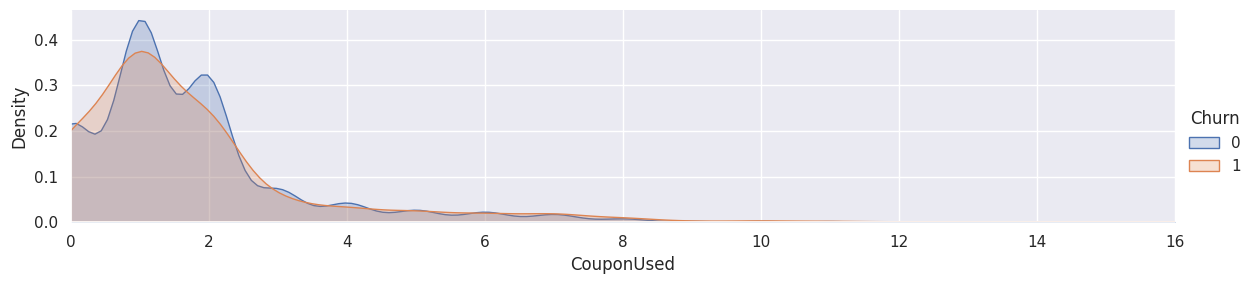

In [57]:
line_chart_non_categorical("CouponUsed",df)

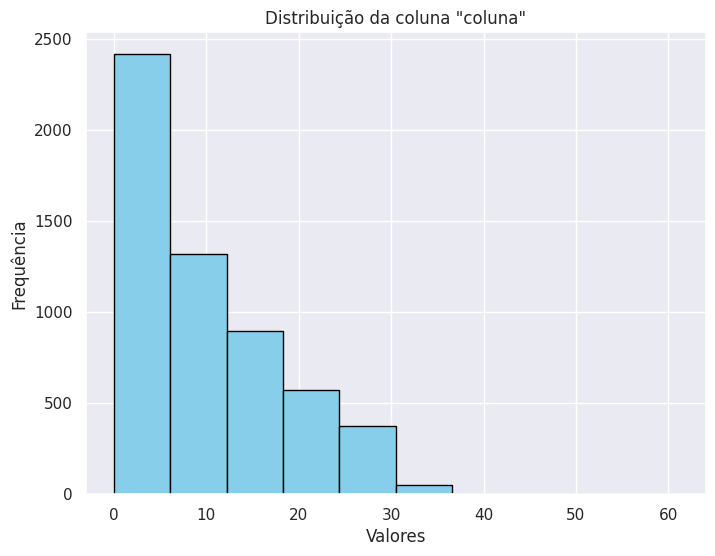

In [58]:
plot_distribution("Tenure",df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

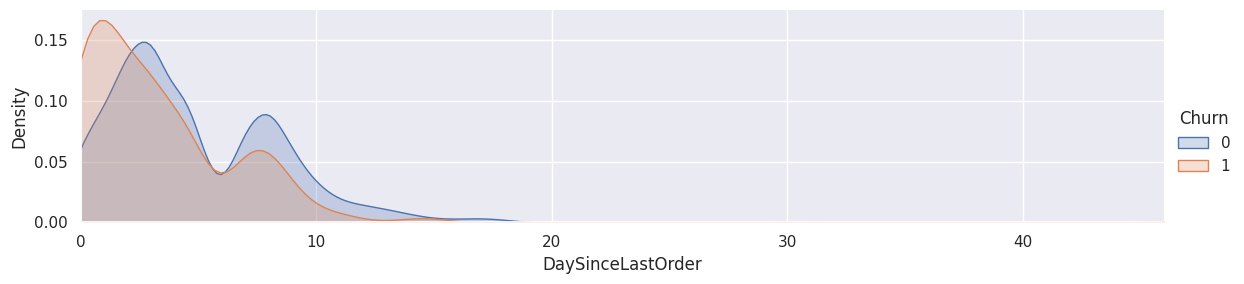

In [59]:
line_chart_non_categorical("DaySinceLastOrder",df)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   int64  
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   int64  
 7   Gender                       5630 non-null   int64  
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   int64  
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   int64  
 13  NumberOfAddress   

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [64]:
from sklearn.model_selection import train_test_split
features_drop = ['CustomerID']
train = df.drop(features_drop, axis=1)

train_data = train.drop('Churn', axis=1)
target = train['Churn']

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4504, 18) (4504,)
(1126, 18) (1126,)


In [66]:
#K-Fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [69]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.83813747 0.87361419 0.8248337  0.87361419 0.87111111 0.84666667
 0.80888889 0.85333333 0.82444444 0.87111111]


84.86

In [68]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.94013304 0.94235033 0.96008869 0.96008869 0.94222222 0.95333333
 0.91111111 0.93555556 0.94222222 0.95777778]


94.45

In [70]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.9578714  0.95121951 0.94900222 0.9578714  0.96       0.95111111
 0.95111111 0.93333333 0.96       0.95777778]


95.29

In [71]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# Naive Bayes Score
round(np.mean(score)*100, 2)

[0.84478936 0.83592018 0.83370288 0.84035477 0.86444444 0.86666667
 0.83333333 0.82666667 0.84888889 0.87111111]


84.66

In [72]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.827051   0.85365854 0.81818182 0.84257206 0.84222222 0.81777778
 0.80666667 0.84222222 0.82444444 0.83111111]


83.06

In [75]:
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=13)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Acurácia no conjunto de teste:", accuracy)

Acurácia no conjunto de teste: 0.9724689165186501


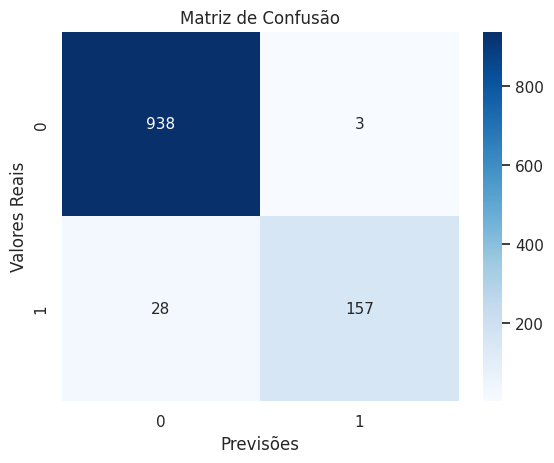

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 11})
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [82]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import classification_report
## Hiperparam tuning

param_grid = {
    'n_estimators': [3,7,14,60,100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

nb = RandomForestClassifier()

grid_search = GridSearchCV(nb, param_grid, cv=k_fold, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação de validação cruzada:", round(grid_search.best_score_*100, 2))

Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor pontuação de validação cruzada: 96.71
